<a href="https://colab.research.google.com/github/Zaryn-Ooi/Is-it-hard-to-find-love-in-Singapore/blob/main/NLP_youtube_comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Is it hard to find love in Singapore ?***
 
### **Project Objective** : 

Despite having more opportunities to meet people, the age at which Singaporeans are getting hitched continues to rise. 


As of 2020, the median age of first-time grooms in Singapore was 30.4 years old and 28.8 years old for first-time brides. While this had remained relatively constant for men since 2011, the median age of marriage for women had been increasing, indicating a trend amongst Singaporean women in delaying marriage.

According to an interview done by TODAY, singles aged between 20 and 35 said that they were dating actively and going on dates as frequently as once every two weeks. However, these dates usually fell short of their expectations and did not progress to any long-term relationship.  

So, the main question of this project is to determine: Is it hard to find love in Singapore ?

### **Project Overview** :
#### The Training Process :
In the training process, our VADER Sentiment Analysis model learns to associate a particular input (i.e. a comment) to the corresponding output (tag) based on the test samples used for training. The feature extractor transfers the text input into a feature vector. Pairs of feature vectors and tags (e.g. positive or negative) are fed into the machine learning algorithm to generate a model.

#### The Prediction Process :
In the prediction process, we explored vectorization strategies and multiple classification models like Naïve Bayes and Support Vector Machine Classifier (SVM). In this case, the feature extractor is used to transform unseen text inputs into feature vectors. These feature vectors are then fed into the classification model, which generates predicted tags (eg. positive or negative).

#### The Cross Validation Process :
In the cross validation process, we aim to improve the accuracy of our current model by Parameter estimation using GridSearch technique. From this process, we are able to determine which model can best predict the tags.  





### **Dataset Description** :
The dataset consists of 211 data extracted from the comments of a youtube video. 

There are 3 columns in this dataset:

- Name: the name of the youtube user who commented the video
- Comments: the text of the comment
- Likes: the number of likes of the comment

Data Source: Is it hard to find love in Singapore? | Mothership Hits The Streets

Video URL: https://www.youtube.com/watch?v=4Bfec3zlujU

## Extract the comment of the youtube video as our datasource

In [151]:
## gs script, ony works with Javascript
function scrapeCommentsWithReplies(){
  var ss = SpreadsheetApp.getActiveSpreadsheet();
  var result=[['Name','Comment','Time','Likes','Reply Count','Reply Author','Reply','Published','Updated']];
  var vid = SpreadsheetApp.openByUrl("https://docs.google.com/spreadsheets/d/1AyTz2n2WlArAQ6yBuXJC8__TV1GWJFE6-LJJ9SAo7ZI/edit?usp=sharing").getRange('A1').getValue();
  var nextPageToken=undefined;
  
  while(1){
   
      var data = YouTube.CommentThreads.list('snippet', {videoId: vid, maxResults: 100, pageToken: nextPageToken})
      nextPageToken=data.nextPageToken
      for (var row=0; row<data.items.length; row++) {
            result.push([data.items[row].snippet.topLevelComment.snippet.authorDisplayName,
                 data.items[row].snippet.topLevelComment.snippet.textDisplay,
                 data.items[row].snippet.topLevelComment.snippet.publishedAt,
                 data.items[row].snippet.topLevelComment.snippet.likeCount,
                 data.items[row].snippet.totalReplyCount,'','','','']);
        if(data.items[row].snippet.totalReplyCount>0){
          parent=data.items[row].snippet.topLevelComment.id
          var nextPageTokenRep=undefined
          while(1){
            var data2=YouTube.Comments.list('snippet', {videoId: vid, maxResults: 100, pageToken: nextPageTokenRep,parentId:parent})
            nextPageTokenRep=data2.nextPageToken;
            for (var i =data2.items.length-1;i>=0;i--){
              result.push(['','','','','',
                       data2.items[i].snippet.authorDisplayName,
                       data2.items[i].snippet.textDisplay,
                       data2.items[i].snippet.publishedAt,
                       data2.items[i].snippet.updatedAt]);
            }
            if(nextPageTokenRep =="" || typeof nextPageTokenRep === "undefined"){
              break
            }
          } 
        }
      }   
    if(nextPageToken =="" || typeof nextPageToken === "undefined"){
      break;
    }
}

var newSheet=SpreadsheetApp.openByUrl("https://docs.google.com/spreadsheets/d/1AyTz2n2WlArAQ6yBuXJC8__TV1GWJFE6-LJJ9SAo7ZI/edit?usp=sharing").insertSheet(SpreadsheetApp.openByUrl("https://docs.google.com/spreadsheets/d/1AyTz2n2WlArAQ6yBuXJC8__TV1GWJFE6-LJJ9SAo7ZI/edit?usp=sharing").getNumSheets())
newSheet.getRange(1, 1,result.length,9).setValues(result)

}

## Import Packages and Load Dataset

In [152]:
# Import packages
!pip install pywaffle
import pandas as pd
import numpy as np
from pywaffle import Waffle
import matplotlib.pyplot as plt

In [153]:
# Load data
from google.colab import files
uploaded = files.upload()

Saving youtube_comment.csv to youtube_comment (1).csv


In [154]:
df = pd.read_csv('youtube_comment.csv')
df.head()

,Name,Comment,Likes,Word
0,SG,Do an episode on how singles coping or plannin...,0,love
1,Wilson L,Love is a relationship where there are mutual ...,0,money
2,Muhammad Fahmi,"In my experience, talk is cheap. I have met al...",0,relationship
3,dino yuan,"I disagree, its really tough, most Singapore g...",0,materialistic
4,Boni Chang,"Love, &#39;sarang&#39;, &#39;Ài&#39; is nothin...",0,cheap


In [155]:
df = df.drop(["Word","Name"], axis=1)
df.head()

,Comment,Likes
0,Do an episode on how singles coping or plannin...,0
1,Love is a relationship where there are mutual ...,0
2,"In my experience, talk is cheap. I have met al...",0
3,"I disagree, its really tough, most Singapore g...",0
4,"Love, &#39;sarang&#39;, &#39;Ài&#39; is nothin...",0


In [156]:
len(df)

210

## Data Cleaning

In [157]:
# Detect and remove NaN values 
df.isnull().sum()

Comment    0
Likes      0
dtype: int64

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  210 non-null    object
 1   Likes    210 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


The comments contained in the dataset seem to contain “impurities” that may mislead our machine learning models. In this case, we will:

- Removing hashtags (#) and mentions(@): The word #cool and cool may be interpreted as different words by a computer. 

- Removing url 

- Removing multiple whitespaces: There are comments with several whitespaces. We decided to remove those whitespaces since they don’t add any useful information to the meaning of the text.

In [159]:
# Convert the comment field from object into string
df['Comment']=df['Comment'].apply(str)

In [160]:
df['Comment'] = df['Comment'].replace(np.nan, '')

In [161]:
## optional to run
# from google.colab import drive
# drive.mount('/content/drive')

In [162]:
# Remove user mentions and hashtag
import re

def remove_mhash(row_text):
    processed_text = re.sub(r'@[\w]+|#[\w]+',"",  row_text)
    return processed_text

In [163]:
df['Comment'] = df['Comment'].apply(remove_mhash)

In [164]:
# Remove url
def remove_url(row_text):
    processed_text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+","", row_text)
    processed_text = re.sub(r'<a href=',"", processed_text)
    return processed_text 

df['Comment'] = df['Comment'].apply(remove_url)

In [165]:
# Check for whitespace strings
blanks = []
for i,lb,rv in df.itertuples():
    if type(rv)==str:
        if rv.isspace():
            blanks.append(i)
            
print(len(blanks), 'blanks: ', blanks)


0 blanks:  []


# Sentiment Analysis

In [166]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [167]:
# Import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Add new words into the vocabulary
The value range from -4 to 4 where -4.0 is the most negative and +4.0 is the most positive.

For example:

- Angmoh = the word 'angmoh' refers to foreigners in Singapore English. In this case, most viewers commented that Singaporean women prefer angmoh over local singaporean. For this reason, we will shift the value of 'angmoh' to a negative value. 

- Money = most of the word 'money' that was mentioned in the comments refers to 'No money, no love'.

In [168]:
new_words = {
    'angmoh': -3.0,
    'single': -4.0,
    'money': -4.0,
    'love': 0.0, 
    'materialistic': -2.0,
    'hard': -4.0,
    'cheap': -1.0,
    'tough': -2.0,
    'easy': 4.0
    }


In [169]:
# Create a SIA object
SIA = SentimentIntensityAnalyzer()
SIA.lexicon.update(new_words)

In [170]:
# Use SIA to append a label to the dataset
df['scores'] = df['Comment'].apply(lambda image_text:SIA.polarity_scores(image_text))

df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['label'] = df['compound'].apply(lambda c: 'positive' if c>= 0.5 else 'negative') 

df.head(10)

,Comment,Likes,scores,compound,label
0,Do an episode on how singles coping or plannin...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
1,Love is a relationship where there are mutual ...,0,"{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'comp...",0.8360,positive
2,"In my experience, talk is cheap. I have met al...",0,"{'neg': 0.08, 'neu': 0.757, 'pos': 0.162, 'com...",0.9249,positive
3,"I disagree, its really tough, most Singapore g...",0,"{'neg': 0.563, 'neu': 0.437, 'pos': 0.0, 'comp...",-0.7907,negative
4,"Love, &;sarang&;, &;Ài&; is nothing but an ill...",0,"{'neg': 0.249, 'neu': 0.751, 'pos': 0.0, 'comp...",-0.6486,negative
5,Singapore women are too damn materialistic hen...,0,"{'neg': 0.154, 'neu': 0.795, 'pos': 0.051, 'co...",-0.7003,negative
6,"Personally for me as a male in Singapore, I fi...",3,"{'neg': 0.066, 'neu': 0.915, 'pos': 0.019, 'co...",-0.5220,negative
7,Maybe you need a change of perspective and exp...,0,"{'neg': 0.093, 'neu': 0.813, 'pos': 0.093, 'co...",0.0000,negative
8,Everywhere is the same. No money no honey. Lov...,0,"{'neg': 0.365, 'neu': 0.635, 'pos': 0.0, 'comp...",-0.9371,negative
9,"I&;m Singaporean, dip level education I make l...",2,"{'neg': 0.147, 'neu': 0.614, 'pos': 0.239, 'co...",0.5242,positive


In [171]:
# count of each label
df['label'].value_counts()

negative    158
positive     52
Name: label, dtype: int64

In [172]:
# Display how negative comments looks like
negative = df.loc[df['label'] == 'negative']
negative.head()

,Comment,Likes,scores,compound,label
0,Do an episode on how singles coping or plannin...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
3,"I disagree, its really tough, most Singapore g...",0,"{'neg': 0.563, 'neu': 0.437, 'pos': 0.0, 'comp...",-0.7907,negative
4,"Love, &;sarang&;, &;Ài&; is nothing but an ill...",0,"{'neg': 0.249, 'neu': 0.751, 'pos': 0.0, 'comp...",-0.6486,negative
5,Singapore women are too damn materialistic hen...,0,"{'neg': 0.154, 'neu': 0.795, 'pos': 0.051, 'co...",-0.7003,negative
6,"Personally for me as a male in Singapore, I fi...",3,"{'neg': 0.066, 'neu': 0.915, 'pos': 0.019, 'co...",-0.5220,negative


In [173]:
# Display how positive comment looks like
positive = df.loc[df['label'] == 'positive']
positive.head()

,Comment,Likes,scores,compound,label
1,Love is a relationship where there are mutual ...,0,"{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'comp...",0.8360,positive
2,"In my experience, talk is cheap. I have met al...",0,"{'neg': 0.08, 'neu': 0.757, 'pos': 0.162, 'com...",0.9249,positive
9,"I&;m Singaporean, dip level education I make l...",2,"{'neg': 0.147, 'neu': 0.614, 'pos': 0.239, 'co...",0.5242,positive
13,We look for love with our eHard and what your ...,2,"{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp...",0.5267,positive
15,easy to find love? depends on the person. Look...,1,"{'neg': 0.046, 'neu': 0.756, 'pos': 0.198, 'co...",0.7783,positive


In [174]:
# Display how neutral comment looks like
neutral = df.loc[df['label'] == 'neutral']
neutral.head()

,Comment,Likes,scores,compound,label


## Visualize the result of our sentiment analysis

In [175]:
# percentage of each label
df['label'].value_counts(normalize = True)

negative    0.752381
positive    0.247619
Name: label, dtype: float64

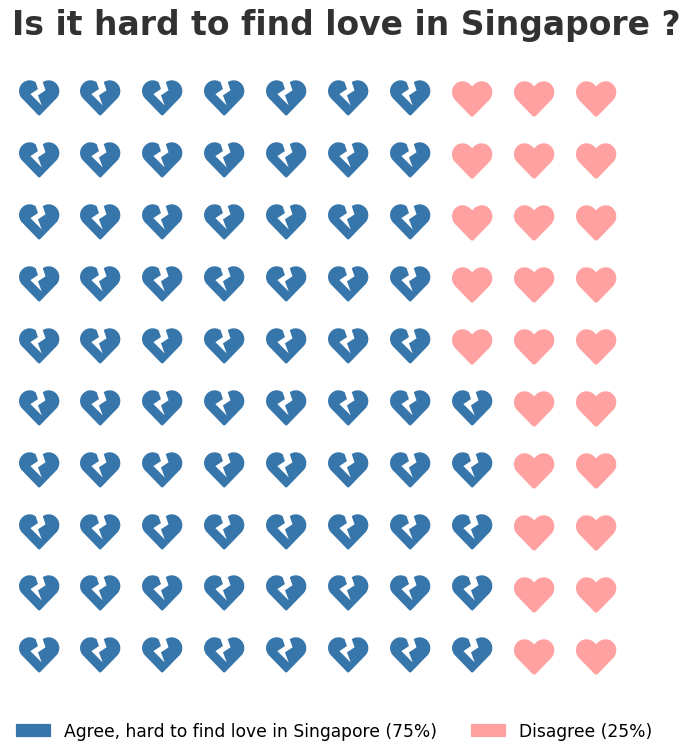

In [176]:
# Visualize the percentage of each label with Waffle Chart
data = {'Agree, hard to find love in Singapore': 75, 'Disagree': 25} 
fig = plt.figure(
    FigureClass = Waffle,
    figsize =(13,8),
    dpi = 88,
    rows = 10,
    colors=["#3776ab","#ffa1a1"],
    icons=['heart-broken','heart'],
    values = data,
    #labels = list(wafflechart.label),
    legend={'loc': 'center left', 'bbox_to_anchor': (-0.03, -0.1), 'ncol': len(data), 'framealpha': 0, 'fontsize':14},
    labels=["{0} ({1}%)".format(n, v) for n, v in data.items()]
)

fig.text(0.012,1.02,'Is it hard to find love in Singapore ?',fontfamily='DejaVu Sans',fontsize=27,fontweight='bold',color='#323232')
plt.show()

## Train test split

In [177]:
y = df['label']
X = df['Comment']

In [178]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)


## Build pipelines to vectorize the data, then train and fit a model
Now that we have sets to train and test, we'll develop a selection of pipelines, each with a different model.

In [179]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', SVC()),
])

## Feed the training data through the first pipeline

In [180]:
# Naïve Bayes
text_clf_nb.fit(X_train, y_train)

# SVC
text_clf_lsvc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

## Run predictions and analyze the results

In [181]:
from sklearn import metrics
# Naïve Bayes
predictions_nb = text_clf_nb.predict(X_test)
nb_accuracy = metrics.accuracy_score(y_test,predictions_nb)
print("Naïve Bayes Accuracy Score: {}".format(nb_accuracy))

# SVC
predictions_svc = text_clf_lsvc.predict(X_test)
SVC_accuracy = metrics.accuracy_score(y_test,predictions_svc)
print("SVC Accuracy Score: {}".format(SVC_accuracy))

Naïve Bayes Accuracy Score: 0.7142857142857143
SVC Accuracy Score: 0.7142857142857143


In [182]:
nb_confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,predictions_nb), index=['neg','pos'], columns=['neg','pos'])
nb_confusion_matrix

,neg,pos
neg,30,0
pos,12,0


In [183]:
print(metrics.classification_report(y_test,predictions_nb))

              precision    recall  f1-score   support

    negative       0.71      1.00      0.83        30
    positive       0.00      0.00      0.00        12

    accuracy                           0.71        42
   macro avg       0.36      0.50      0.42        42
weighted avg       0.51      0.71      0.60        42



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [184]:
SVC_confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,predictions_svc), index=['neg','pos'], columns=['neg','pos'])
SVC_confusion_matrix

,neg,pos
neg,30,0
pos,12,0


In [185]:
print(metrics.classification_report(y_test,predictions_svc))

              precision    recall  f1-score   support

    negative       0.71      1.00      0.83        30
    positive       0.00      0.00      0.00        12

    accuracy                           0.71        42
   macro avg       0.36      0.50      0.42        42
weighted avg       0.51      0.71      0.60        42



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We got 71 % accuracy but did you notice that recall and precision for class positive are always 0. This means that the classifier is always classifying everything into a single class i.e class negative.


Therefore, our model needs to have its parameters tuned.


# Cross Validation
Here is when the usefulness of GridSearch comes into the picture. We can search for parameters using GridSearch. 

### Naive Bayes Hyperparameter Tuning using GridSearchCV

In [186]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [187]:
# get parameters of MultinomialNB
MultinomialNB().get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [188]:
# GridSearchCV on MultinomialNB
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X_trainv = vectorizer.transform(X_train)
X_testv = vectorizer.transform(X_test)

# Create the hyperparameter grid
params_grid = {'alpha': np.arange(0, 1, 0.05), 'class_prior':[None], 'fit_prior':[True, False]}

# Setup the GridSearchCV object: gm_cv
nb_model = MultinomialNB()

gm_cv = GridSearchCV(nb_model, params_grid, cv = 5)

# Fit it to the training data
gm_cv.fit(X_trainv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'class_prior': [None], 'fit_prior': [True, False]})

In [189]:
# Print best parameter after tuning
print(gm_cv.best_params_)
 
# Print how our model looks after hyper-parameter tuning
print(gm_cv.best_estimator_)

{'alpha': 0.4, 'class_prior': None, 'fit_prior': True}
MultinomialNB(alpha=0.4)


In [190]:
# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_testv) 
print(metrics.accuracy_score(y_test, y_pred))

0.7142857142857143


In [191]:
nb_cmtuned = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index=['neg','pos'], columns=['neg','pos'])
nb_cmtuned

,neg,pos
neg,30,0
pos,12,0


In [192]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.71      1.00      0.83        30
    positive       0.00      0.00      0.00        12

    accuracy                           0.71        42
   macro avg       0.36      0.50      0.42        42
weighted avg       0.51      0.71      0.60        42



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM Hyperparameter Tuning using GridSearchCV

In [193]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [194]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [195]:
for i in range(4):
    # Separate data into test and training sets
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_trainv, y_train)# Make prediction
    svc_pred = svclassifier.predict(X_testv)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(metrics.classification_report(y_test,svc_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

    negative       0.71      1.00      0.83        30
    positive       0.00      0.00      0.00        12

    accuracy                           0.71        42
   macro avg       0.36      0.50      0.42        42
weighted avg       0.51      0.71      0.60        42

Evaluation: RBF kernel
              precision    recall  f1-score   support

    negative       0.71      1.00      0.83        30
    positive       0.00      0.00      0.00        12

    accuracy                           0.71        42
   macro avg       0.36      0.50      0.42        42
weighted avg       0.51      0.71      0.60        42

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

    negative       0.71      1.00      0.83        30
    positive       0.00      0.00      0.00        12

    accuracy                           0.71        42
   macro avg       0.36      0.50      0.42     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [196]:
# Create the hyperparameter grid
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

# Setup the GridSearchCV object: svc_cv
SVC_model = SVC()

grid = GridSearchCV(SVC_model,param_grid,refit=True,verbose=2)

# Fit it to the training data
grid.fit(X_trainv, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [197]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=10, gamma=1, kernel='sigmoid')


In [198]:
grid_predictions = grid.predict(X_testv)
print(metrics.accuracy_score(y_test, grid_predictions))

0.8333333333333334


In [199]:
SVC_cmtuned = pd.DataFrame(metrics.confusion_matrix(y_test,grid_predictions), index=['neg','pos'], columns=['neg','pos'])
SVC_cmtuned

,neg,pos
neg,30,0
pos,7,5


In [200]:
print(metrics.classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

    negative       0.81      1.00      0.90        30
    positive       1.00      0.42      0.59        12

    accuracy                           0.83        42
   macro avg       0.91      0.71      0.74        42
weighted avg       0.86      0.83      0.81        42



## Conclusion

#### Key Takeaways:
Throughout this project, we observed that the majority of Singaporeans think that it is hard to find love in Singapore !

#### Prediction Model:
Based on the cross validation result, Support Vector Machine Classifier (SVM) is our current best model of this project. The model has achieved 83% of accuracy score. The model shows and F1-score of 0.90 on class negative and 0.59 on class positive on the test set.

## Limitations:
- The dataset is small and might lead to lower precision in our predictions. 

- Sentiment analysis model is not able to detect irony and sarcasm. 
